<a href="https://colab.research.google.com/github/sarasuadiv/Artificial-Neural-Network-Training/blob/main/Redes_Neuronales_Artificiales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importar librerías

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from tensorflow import keras
import tensorflow as tf

#Creación de la serie de tiempo

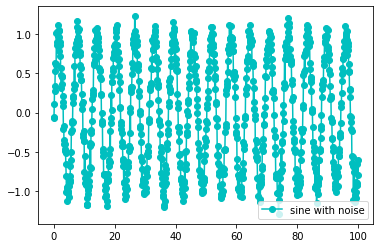

In [ ]:
#Arreglos:
time = np.arange(0,100, 0.1) #Tiempo de 0 a 100 con pasos de tiempo de 0.1
sin = np.sin(time) + np.random.normal(scale=0.1, size=len(time)) #Función seno + ruido (mientras más grnade la desviación estandar (0.5), mayor ruido)

#Graficar
plt.plot (time, sin, "co-", label = "sine with noise" ) #eje x, eje, y, graficar con puntos y líneas, etiqueta
plt.legend() #Muestra la leyenda

#Procesamiento de datos

In [ ]:
#Dataframe en pandas

df=pd.DataFrame(dict(sine = sin), index = time, columns=['sine']) #Diccionario que llama a la función seno, identificador, columna
df.head #Muestra encabezado
df.plot #Grafica

In [ ]:
#Conjuntos de entrenamiento
train_size= int(len (df) * 0.8)
test_size= len(df) - train_size

#División de los conjuntos de entrenamiento
train, test = df.iloc[0:train_size], df.iloc[train_size:len(df)]
print(len(train), len(test))

800 200


In [ ]:
train #Muestra todo el dataframe

,sine
0.0,-0.072421
0.1,-0.056363
0.2,0.104475
0.3,0.333180
0.4,0.278304
...,...
79.5,-0.716956
79.6,-0.976507
79.7,-0.980181
79.8,-0.999756


#Crear un procedimiento para partir en arreglos los dataframe. Partimos la serie de tiempo en dataframes.

In [ ]:
#Función para hacer una ventana temporal y partir los conjuntos (entrenamiento y prueba)

def create_dataset(X, y, time_steps=1): #neuronas de entrada x, salidas y "etiquetas", tamaño de la red (pasos de tiempo para formar las ventanas temporales)
  Xs, ys = [], [] #Listas vacías que sirven para las entradas (Xs) y las salidas (ys)
  for i in range(len(X) - time_steps): #Es el tamaño de toda la función menos la longitud de la ventana
    v=X.iloc[i:i+time_steps].values #Acceder a los valores de la ventana
    Xs.append(v) #Agregar arreglo a la lista vacía de entradas
    ys.append(y.iloc[i+time_steps]) #Agregar arreglo a la lista vacía de salidas
   
  return np.array(Xs), np.array(ys) #Keras solo acepta arreglos de Numpy




#Creamos los conjuntos de entrenamiento y de prueba como arreglos.

In [ ]:
time_steps = 10 #Tomamos 10 neuronas (que son 10 datos), esto es equivalente al tamaño de la ventana temporal.

#Arreglos de "arreglos" para el entrenamiento

#Genera el conjunto
X_train, y_train = create_dataset(train, train.sine, time_steps)
X_test, y_test = create_dataset(test, test.sine, time_steps)

X_train[1] #Muestra el primer arreglo de 10 números



array([[-0.05636345],
       [ 0.10447461],
       [ 0.33318001],
       [ 0.27830424],
       [ 0.52756417],
       [ 0.63196095],
       [ 0.61276476],
       [ 0.60565721],
       [ 1.01240532],
       [ 0.86491419]])

In [ ]:
y_train[1] #Muestra el dato de mi neurona de salida

0.8972879101521102

In [ ]:
print(X_train.shape, y_train.shape ) #Imprime las dimensiones: entradas, valores, cuántos números hay en cada valor. El segundo es solo el número de la y.

(790, 10, 1) (790,)


#Creando la Red Neuronal Artificial (ANN)

In [ ]:
#Red Long short term memory (LSTM). Red neuronal que tiene memoria (autoenlaces para guardar el estado anterior de cada nodo y que sirvan de entrada).

#Modelo: en terminología de redes es la arquitectura de la red (neuronas, capas, etc.)

model = keras.Sequential() #Red secuencial multicapa. Conecta las neuronas con una capa anterior con la actual.

#Capas

#Capa de entrada LSTM con 128 neuronas y una matriz de entrada de 10 x 1
model.add(keras.layers.LSTM(128, input_shape=(X_train.shape[1], X_train.shape[2])))

# Para agregar otra capa: model.add(keras.layers.LSTM(128, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))

#Capa de salida. Es un a capa "densa que va conectada con la anterior"
model.add(keras.layers.Dense(1))

#Compilamos y declaramos los hiperparámetros de la ANN
model.compile(loss = "mean_squared_error", optimizer= keras.optimizers.Adam(0.001)) #Función de pérdida, algoritmo de aprendizaje, el 00.1 es la eta (razón de aprendizaje)


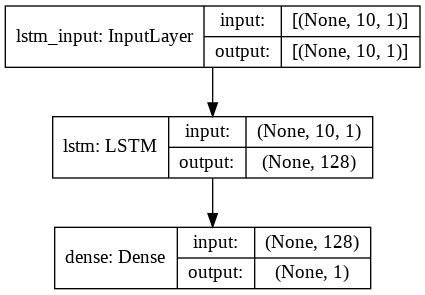

In [ ]:
#Gráfica de las capas
dot_image= "model.png" 
tf.keras.utils.plot_model(model, to_file = dot_image, show_shapes= True)


In [ ]:
#Aprendizaje ("Fit" es el ajuste de los parámetros)

#Hiperparámetros
history = model.fit(
   X_train, y_train, #Conjunto de entrenamiento y de aprendizaje
   epochs = 10, #Épocas (cuántas veces va a recorrer todos los datos el modelo)
   batch_size = 16, #Tamaño de "batch" (subconjuntos al azar de los 720)
   validation_split = 0.1, # % del conjunto de entrenamiento que utilizaremos para validar
   verbose = 1, #Sirve para ver el progreso, 1 imprime el progreso en pantalla 2 no lo imprime.
   shuffle = True #"Aleatorización "
) 

Epoch 1/10
45/45 [==============================] - 3s 22ms/step - loss: 0.1531 - val_loss: 0.0777
Epoch 2/10
45/45 [==============================] - 0s 11ms/step - loss: 0.0303 - val_loss: 0.0223
Epoch 3/10
45/45 [==============================] - 1s 11ms/step - loss: 0.0172 - val_loss: 0.0326
Epoch 4/10
45/45 [==============================] - 0s 11ms/step - loss: 0.0171 - val_loss: 0.0212
Epoch 5/10
45/45 [==============================] - 1s 11ms/step - loss: 0.0171 - val_loss: 0.0235
Epoch 6/10
45/45 [==============================] - 1s 12ms/step - loss: 0.0155 - val_loss: 0.0215
Epoch 7/10
45/45 [==============================] - 1s 12ms/step - loss: 0.0156 - val_loss: 0.0222
Epoch 8/10
45/45 [==============================] - 1s 12ms/step - loss: 0.0152 - val_loss: 0.0253
Epoch 9/10
45/45 [==============================] - 1s 12ms/step - loss: 0.0156 - val_loss: 0.0236
Epoch 10/10
45/45 [==============================] - 1s 12ms/step - loss: 0.0159 - val_loss: 0.0210


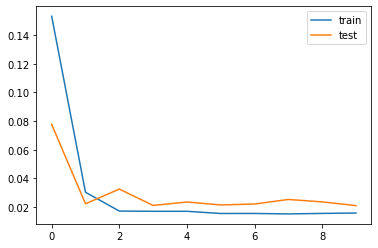

In [ ]:
#Grafica la pérdida

plt.plot(history.history["loss"], label = "train")
plt.plot(history.history["val_loss"], label = "test")
plt.legend()

In [ ]:
#Usa el conjunto de prueba para hacer predicciones

y_pred= model.predict(X_test) 

In [ ]:
X_test[0] #Usar los valores para qu nos de una predicción

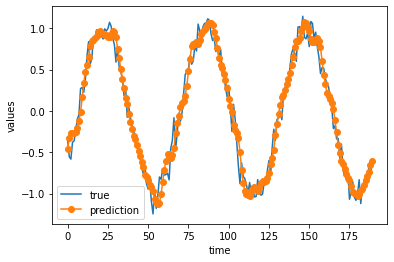

In [ ]:
#Gráfica de las predicciones

plt.plot(y_test, label="true")
plt.plot(y_pred, 'o-', label = "prediction")
plt.xlabel("time")
plt.ylabel("values")
plt.legend()

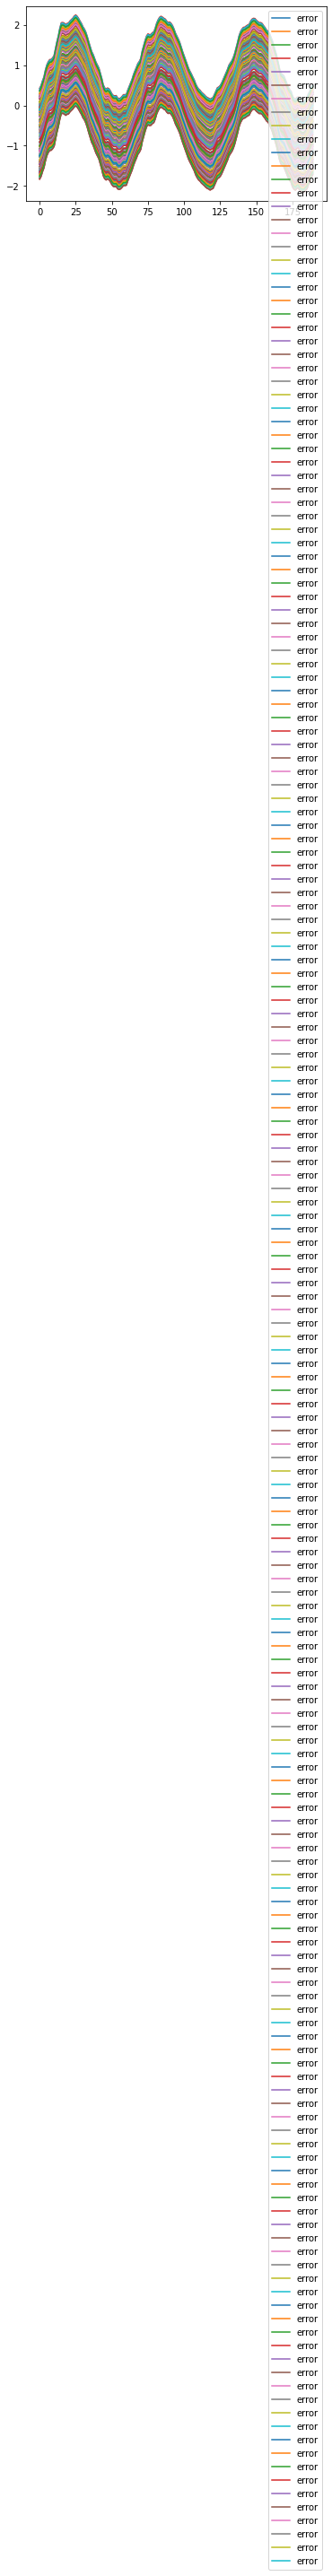

In [ ]:
#Grafica error sobre el conjunto de prueba 
#(ojo: grafica los 720 puntos)

err= y_pred - y_test
plt.plot(err, label = "error") 
plt.legend()

##Salvar la red (Transferencia)

In [ ]:
from keras.models import model_from_json
model.save("model.h5")

from keras.models import load_model

import h5py 

model = load_model("model.h5")
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 128)               66560     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 129       
Total params: 66,689
Trainable params: 66,689
Non-trainable params: 0
_________________________________________________________________


#Serie de tiempo univariada

#####(Basado en este tutorial: https://www.tensorflow.org/tutorials/structured_data/time_series)

In [ ]:
#Importar los datos

import os 

#Guarda la base de datos del sitio en cuestión
zip_path = tf.keras.utils.get_file(
    origin='https://storage.googleapis.com/tensorflow/tf-keras-datasets/jena_climate_2009_2016.csv.zip',
    fname='jena_climate_2009_2016.csv.zip',
    extract=True)

#Lo descarga, descomprime y guarda en la variable
csv_path, _ = os.path.splitext(zip_path)

In [ ]:
#Leer los datos

df= pd.read_csv(csv_path)
df.head() #Muestra el encabezado para ver qué hay en la base de datos
len(df) #Muestra la cantidad de datos
df.shape #Muestra la estructura de la matriz

(420551, 15)

In [ ]:
#Creación de dataset

X=df["T (degC)"]

X=X.to_frame() #Convierte los datos en un Dataframe

X.index=df["Date Time"]

X.head()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f4141a78590>],
      dtype=object)

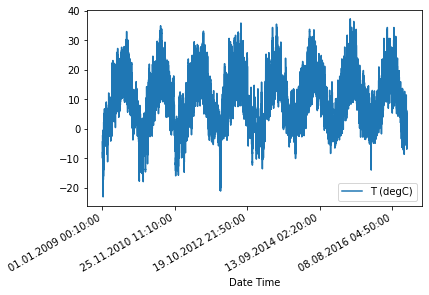

In [ ]:
X.plot(subplots=True) #Grafica la columna que hicimos

In [ ]:
train_size=int(len(X) * 0.8) #Longitud del conjunto de entrenamiento
test_size=len(X) - train_size
train, test = X.iloc[0:train_size], X.iloc[train_size:len(X)]

print(train.shape, test.shape) #Nos da los datos de las ventanas para verificar que tenga el tamaño adecuado

(336440, 1) (84111, 1)


In [ ]:
#Crea patrones con los que entrenaremos a la red

time_steps= 20
X_train, y_train = create_dataset(train, train["T (degC)"], time_steps)

time_steps= 20
X_test, y_test = create_dataset(test, train["T (degC)"], time_steps)
print(X_train.shape, y_train.shape)


(336420, 20, 1) (336420,)


In [ ]:
#Red Neuronal

model=keras.Sequential()
model.add(keras.layers.LSTM(16, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(keras.layers.Dense(1))

model.compile(loss="mean_squared_error", optimizer=keras.optimizers.Adam(0.0001))

In [ ]:
history = model.fit(
   X_train, y_train, #Conjunto de entrenamiento y de aprendizaje
   epochs = 10, #Épocas (cuántas veces va a recorrer todos los datos el modelo)
   batch_size = 16, #Tamaño de "batch" (subconjuntos al azar de los 720)
   validation_split = 0.1, # % del conjunto de entrenamiento que utilizaremos para validar
   verbose = 1, #Sirve para ver el progreso, 1 imprime el progreso en pantalla 2 no lo imprime.
   shuffle = False #"Aleatorización "
) 

Epoch 1/10
18924/18924 [==============================] - 140s 7ms/step - loss: 40.1113 - val_loss: 0.8374
Epoch 2/10
18924/18924 [==============================] - 141s 7ms/step - loss: 3.4287 - val_loss: 0.0772
Epoch 3/10
18924/18924 [==============================] - 137s 7ms/step - loss: 0.6697 - val_loss: 0.0430
Epoch 4/10
18924/18924 [==============================] - 140s 7ms/step - loss: 0.2241 - val_loss: 0.0388
Epoch 5/10
18924/18924 [==============================] - 140s 7ms/step - loss: 0.1129 - val_loss: 0.0376
Epoch 6/10
18924/18924 [==============================] - 138s 7ms/step - loss: 0.0749 - val_loss: 0.0370
Epoch 7/10
18924/18924 [==============================] - 139s 7ms/step - loss: 0.0588 - val_loss: 0.0365
Epoch 8/10
18924/18924 [==============================] - 139s 7ms/step - loss: 0.0512 - val_loss: 0.0363
Epoch 9/10
18924/18924 [==============================] - 140s 7ms/step - loss: 0.0474 - val_loss: 0.0363
Epoch 10/10
18924/18924 [====================

#Revisar desde aquí!!!

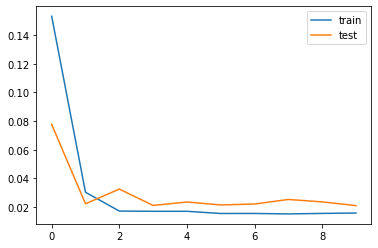

In [ ]:
#Grafica la pérdida

plt.plot(history.history["loss"], label = "train")
plt.plot(history.history["val_loss"], label = "test")
plt.legend()

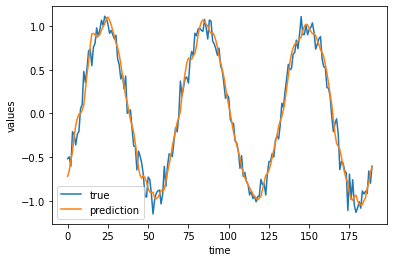

In [ ]:
#Usa el conjunto de prueba para hacer predicciones

y_pred= model.predict(X_test) 

#Gráfica de las predicciones

plt.plot(y_test, label="true")
plt.plot(y_pred, label = "prediction")
plt.xlabel("time")
plt.ylabel("values")
plt.legend()

In [ ]:
#Grafica error sobre el conjunto de prueba 
#(ojo: grafica los 720 puntos)

err= y_pred - y_test
plt.plot(err, label = "error") 
plt.legend()

#Serie de tiempo multivariada

In [ ]:
df.head()

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3


In [ ]:
#Realiza un DataFrame que considera otras variables
featuresDf=df[["T (degC)", "p (mbar)", "rho (g/m**3)" ], index=df["Date Time"]]
featuresDf.index=df["Date Time"]

featuresDf.head()

SyntaxError: ignored

In [ ]:
featuresDf.plot(subplots=True) #Grafica las tres columnas que elegimos

NameError: ignored